In [ ]:
#Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [7]:
#Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

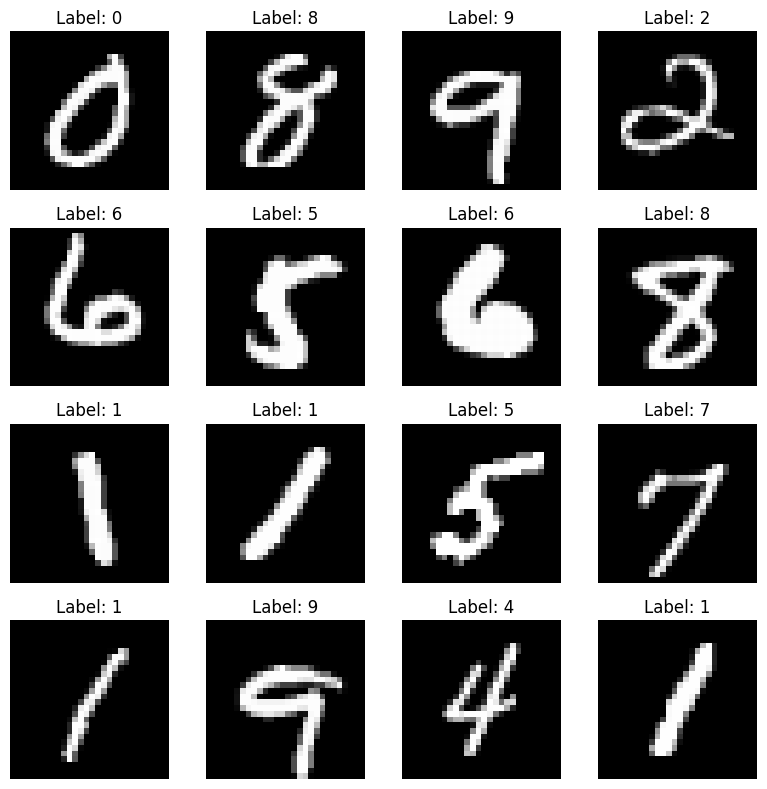

In [8]:
# Load a batch of 16 images
batch = next(iter(train_loader))  # get first batch from DataLoader
images, labels = batch

# Create a 4x4 grid (16 images)
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [24]:
#Define neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 392)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(392,192)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(192,10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
        

In [25]:
#Initialize model, loss, optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [26]:
#Train the model
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
        

Epoch [1/5], Loss: 1.6509
Epoch [2/5], Loss: 0.5297
Epoch [3/5], Loss: 0.3836
Epoch [4/5], Loss: 0.3349
Epoch [5/5], Loss: 0.3051


In [27]:
#Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 92.05%
